# Web Scraping

In [1]:
# Import important libraries

import pandas as pd
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import csv


In [2]:
# Scraping the HTML from web

req = requests.get("https://www.trustpilot.com/review/www.americanexpress.com?page=1")
content = req.content
soup = BeautifulSoup(content, "lxml")
names = soup.find_all('div', attrs={'class': 'consumer-information__name'})
headers = soup.find_all('h2', attrs={'class':'review-content__title'})
bodies = soup.find_all('p', attrs={'class':'review-content__text'})
ratings = soup.find_all('div', attrs={'class':'star-rating star-rating--medium'})
dates = soup.find_all('div', attrs={'class':'review-content-header__dates'})

In [3]:
req

<Response [200]>

In [4]:
names[0]

<div class="consumer-information__name" v-pre="">
            Justin
        </div>

In [5]:
headers[0]

<h2 class="review-content__title">
<a class="link link--large link--dark" data-track-link="{'target': 'Single review', 'name': 'review-title'}" href="/reviews/5ed1be1e25e5d20a88a30049">Business Owners AVOID at all costs..</a>
</h2>

In [6]:
bodies[0]

<p class="review-content__text">
                American Express Open... openly takes full control of your business and leaves you in the dust.<br/><br/>You make a large purchase and use pay over time "when approved" then they take it away the following month making you pay the full amount or get hit with a hefty interest rate.<br/><br/>For businesses you can not change ownership of the card. On the phone they make you think they are changing the ownership to another partner at your company but in reality they are just opening a new account under the new card holder. Our business lost our American Express account, once we approved the transfer and the receiving member in our LLC accepted it. American express did a hard pull on their personal credit and he was denied. Now we had no control over our account. No logins, no cards, because the receiver was not approved.<br/><br/>Lets just say we will never use American Express again for any personal, business, financing and will tell every

In [7]:
ratings[0]

<div class="star-rating star-rating--medium">
<img alt="1 star: Bad" src="//cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-1.svg"/>
</div>

In [8]:
dates[0]

<div class="review-content-header__dates">
<script data-initial-state="review-dates" type="application/json">
{"publishedDate":"2020-05-30T01:59:58Z","updatedDate":"2020-05-30T02:04:14Z","reportedDate":null}
</script>
<review-dates :published-date="publishedDate" :reported-date="reportedDate" :updated-date="updatedDate"></review-dates>
</div>

In [9]:
# Creating lists for saving title and content of each review

title = []
review = []
for x in range(len(headers)):
        title.append(headers[x].get_text().strip())
        review.append(bodies[x].get_text().strip())

In [10]:
title[0]

'Business Owners AVOID at all costs..'

In [11]:
review[0]

'American Express Open... openly takes full control of your business and leaves you in the dust.You make a large purchase and use pay over time "when approved" then they take it away the following month making you pay the full amount or get hit with a hefty interest rate.For businesses you can not change ownership of the card. On the phone they make you think they are changing the ownership to another partner at your company but in reality they are just opening a new account under the new card holder. Our business lost our American Express account, once we approved the transfer and the receiving member in our LLC accepted it. American express did a hard pull on their personal credit and he was denied. Now we had no control over our account. No logins, no cards, because the receiver was not approved.Lets just say we will never use American Express again for any personal, business, financing and will tell everyone within our network to make the switch. I asked to talk to a manager and cu

In [12]:
# Making dictionary to save title and review

data = {'Title':title, 'Review':review}

In [13]:
data['Title'][0:5]

['Business Owners AVOID at all costs..',
 'Look elsewhere...Visa, MasterCard or Discover are WAY BETTER',
 "AMERICAN EXPRESS - THE COMPANY YOU CAN'T RELY ON",
 'Never get an amex card',
 'The Platinum Perennial Torture!']

In [14]:
data["Review"][0:5]

['American Express Open... openly takes full control of your business and leaves you in the dust.You make a large purchase and use pay over time "when approved" then they take it away the following month making you pay the full amount or get hit with a hefty interest rate.For businesses you can not change ownership of the card. On the phone they make you think they are changing the ownership to another partner at your company but in reality they are just opening a new account under the new card holder. Our business lost our American Express account, once we approved the transfer and the receiving member in our LLC accepted it. American express did a hard pull on their personal credit and he was denied. Now we had no control over our account. No logins, no cards, because the receiver was not approved.Lets just say we will never use American Express again for any personal, business, financing and will tell everyone within our network to make the switch. I asked to talk to a manager and c

In [15]:
# Making dataframe from dictionary

dataframe = pd.DataFrame.from_dict(data)
dataframe

,Title,Review
0,Business Owners AVOID at all costs..,American Express Open... openly takes full con...
1,"Look elsewhere...Visa, MasterCard or Discover ...",So I requested a credit line increase because ...
2,AMERICAN EXPRESS - THE COMPANY YOU CAN'T RELY ON,Booked a holiday & paid by American Express fo...
3,Never get an amex card,flights cancelled with airline.Been trying for...
4,The Platinum Perennial Torture!,The Platinum Perennial Torture!Despite being A...
5,Good customer support,Great company. Resolved my issues
6,Wonderful Customer Service!!!,I've never had customer service answer me so q...
7,I had a dispute opened with TravelUp.,I had a dispute opened with TravelUp.Whereas m...
8,The worst!,I would give their customer service a Zero if ...
9,So unhelpful with disputes and customer service,I applied for a refund to Ryanair as our fligh...


In [16]:
print(len(title), len(review))

20 20


In [17]:
# Saving dataframe as a csv file named trustpilot

dataframe.to_csv(r'trustpilot.csv')

In [18]:
# Import trustpilot csv file with name trust_pilot

trust_pilot = pd.read_csv('trustpilot.csv', index_col=0)
trust_pilot

,Title,Review
0,Business Owners AVOID at all costs..,American Express Open... openly takes full con...
1,"Look elsewhere...Visa, MasterCard or Discover ...",So I requested a credit line increase because ...
2,AMERICAN EXPRESS - THE COMPANY YOU CAN'T RELY ON,Booked a holiday & paid by American Express fo...
3,Never get an amex card,flights cancelled with airline.Been trying for...
4,The Platinum Perennial Torture!,The Platinum Perennial Torture!Despite being A...
5,Good customer support,Great company. Resolved my issues
6,Wonderful Customer Service!!!,I've never had customer service answer me so q...
7,I had a dispute opened with TravelUp.,I had a dispute opened with TravelUp.Whereas m...
8,The worst!,I would give their customer service a Zero if ...
9,So unhelpful with disputes and customer service,I applied for a refund to Ryanair as our fligh...


In [19]:
# Converting each review in a string format

para_docs = (trust_pilot.Review.astype('str'))
para_docs

0     American Express Open... openly takes full con...
1     So I requested a credit line increase because ...
2     Booked a holiday & paid by American Express fo...
3     flights cancelled with airline.Been trying for...
4     The Platinum Perennial Torture!Despite being A...
5                     Great company. Resolved my issues
6     I've never had customer service answer me so q...
7     I had a dispute opened with TravelUp.Whereas m...
8     I would give their customer service a Zero if ...
9     I applied for a refund to Ryanair as our fligh...
10    2nd review trying to pay my bill, DCM called m...
11    I have been with American express for 6 years ...
12    American Express has the worst customer servic...
13    Nasty company ! They don't tell the truth ! Th...
14    Guys, I never had ANY issue using my AMEX and ...
15    They're terrible, and even worse when you need...
16    Been with Amex for five years in good standing...
17    I want to give a ZERO star, but I can not.

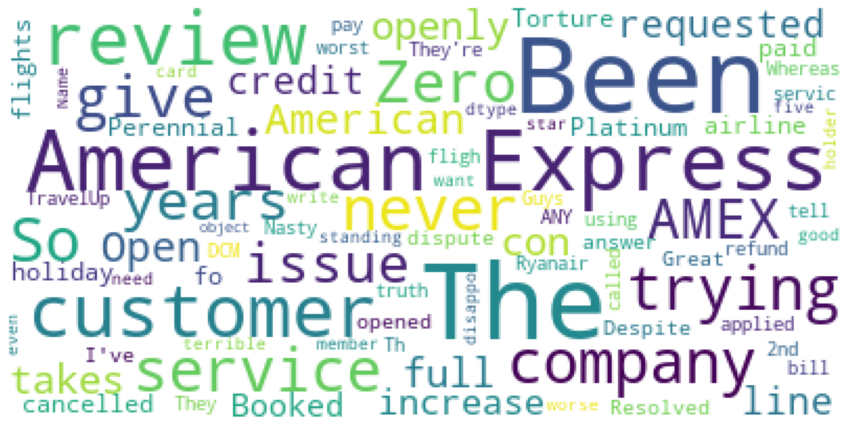

In [20]:
# Making wordcloud of reviews

cloud= WordCloud(background_color='white',stopwords= STOPWORDS, max_words=100,
                    max_font_size=50,random_state=1).generate(str(para_docs))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [21]:
# Import re, nltk libraries and the stopwords feature. List of stopwords has been extended by adding some words on our own.

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
 
STOPWORDS = stopwords.words('english')
newStopWords = ['one', 'like', 'used', 'see','american','express','amex','company']
STOPWORDS.extend(newStopWords)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Define the clean text function

def clean_text(text):
  tokenized_text = word_tokenize(text.lower())
  #print(tokenized_text)
  cleaned_text = [x for x in tokenized_text if x not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', x)]
  #print(cleaned_text)
  return cleaned_text

In [23]:
# Create a list of tokenized words 
 
tokenized_data = []
for text in para_docs:
  tokenized_data.append(clean_text(text))

In [24]:
# Perform tokenization after converting all the words into lower case
 
from nltk.tokenize import word_tokenize
gen_docs = [[w.lower() for w in word_tokenize(text)]  for text in para_docs]


In [25]:
# We import gensim, 
# Create a dictionary from the tokenized data. Next create corpus using the 'bag of words' technique(doc2bow)
 
import gensim
dictionary = gensim.corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(row) for row in tokenized_data]

In [26]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 accepted
1 account
2 amount
3 annual
4 another
5 approval
6 approved
7 approved.lets
8 asked
9 avoid
10 away


In [27]:
from gensim import models, corpora
lda_model = models.LdaModel(corpus = corpus, num_topics = 15, id2word = dictionary)

lda_model.print_topics()

[(0,
  '0.027*"great" + 0.027*"resolved" + 0.027*"issues" + 0.012*"cards" + 0.010*"lenders" + 0.009*"get" + 0.009*"credit" + 0.008*"card" + 0.008*"never" + 0.007*"pay"'),
 (1,
  '0.013*"interest" + 0.010*"account" + 0.010*"fee" + 0.009*"payment" + 0.009*"make" + 0.009*"business" + 0.008*"card" + 0.008*"full" + 0.008*"late" + 0.007*"pay"'),
 (2,
  '0.058*"bill" + 0.032*"told" + 0.031*"send" + 0.022*"handling" + 0.022*"dcm" + 0.022*"pay" + 0.022*"since" + 0.021*"week" + 0.021*"cards" + 0.020*"would"'),
 (3,
  '0.009*"even" + 0.009*"team" + 0.007*"dispute" + 0.007*"call" + 0.006*"back" + 0.006*"relation" + 0.005*"disputes" + 0.005*"never" + 0.005*"charge" + 0.005*"letter"'),
 (4,
  '0.038*"travelup" + 0.025*"dispute" + 0.020*"illegal" + 0.019*"provided" + 0.017*"asked" + 0.014*"paid" + 0.014*"told" + 0.013*"able" + 0.013*"ask" + 0.013*"late"'),
 (5,
  '0.059*"holiday" + 0.020*"tour" + 0.020*"taken" + 0.020*"paid" + 0.020*"back" + 0.020*"cancelled" + 0.020*"responsible" + 0.020*"money" + 0

## LDA Model : https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [29]:
tokenized_data[0]

['open',
 'openly',
 'takes',
 'full',
 'control',
 'business',
 'leaves',
 'dust.you',
 'make',
 'large',
 'purchase',
 'use',
 'pay',
 'time',
 'approved',
 'take',
 'away',
 'following',
 'month',
 'making',
 'pay',
 'full',
 'amount',
 'get',
 'hit',
 'hefty',
 'interest',
 'rate.for',
 'businesses',
 'change',
 'ownership',
 'card',
 'phone',
 'make',
 'think',
 'changing',
 'ownership',
 'another',
 'partner',
 'reality',
 'opening',
 'new',
 'account',
 'new',
 'card',
 'holder',
 'business',
 'lost',
 'account',
 'approved',
 'transfer',
 'receiving',
 'member',
 'llc',
 'accepted',
 'hard',
 'pull',
 'personal',
 'credit',
 'denied',
 'control',
 'account',
 'logins',
 'cards',
 'receiver',
 'approved.lets',
 'say',
 'never',
 'use',
 'personal',
 'business',
 'financing',
 'tell',
 'everyone',
 'within',
 'network',
 'make',
 'switch',
 'asked',
 'talk',
 'manager',
 'customer',
 'support',
 'said',
 'horrible',
 'strives',
 'annual',
 'payment',
 'fees',
 'shady',
 'pay',
 '

In [30]:
corpus

[[(0, 1),
  (1, 3),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 5),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 2),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 3),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 3),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 1)],
 [(10, 1),
  (13, 1),
  (14, 2),
  (19, 5),
  (20, 1),
  (43, 1),
  (56, 1),
  (79, 1